### Adding source folder to the path

In [1]:
import os
import sys

setup_dir = os.path.join(os.getcwd(), '..')
src_dir = os.path.join(setup_dir, 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [2]:
RAW_DATA_FOLDER = '../data/raw/'
ClEANED_DATA_FOLDER = '../data/cleaned/'

train_data_raw_path = os.path.join(RAW_DATA_FOLDER, 'train_data.csv')
test_data_raw_path = os.path.join(RAW_DATA_FOLDER, 'test_data.csv')

train_data_cleaned_path = os.path.join(ClEANED_DATA_FOLDER, 'train_data.csv')
test_data_cleaned_path = os.path.join(ClEANED_DATA_FOLDER, 'test_data.csv')

### packages

In [22]:
import numpy as np
import pandas as pd

from data_preparation.data_utils import \
load_data, \
get_features_with_missing_values, \
replace_missing_with_single_value, \
plot_distribution, \
three_sigma_outlier

### Load data

In [4]:
train_data = load_data(train_data_raw_path)
test_data = load_data(test_data_raw_path)

num records:  11588
num dimensions:  24
num records:  4402
num dimensions:  24


### Handling missing values

In [5]:
features_missing_train = get_features_with_missing_values(train_data)
features_missing_train

{'GarageSquareFeet': 2841,
 'ViewType': 8956,
 'BGMedHomeValue': 6,
 'BGMedRent': 2631,
 'BGMedYearBuilt': 247}

In [6]:
# Garage: Missing values indicate a missing garage
train_data = replace_missing_with_single_value(train_data, 
                                               'GarageSquareFeet', 
                                               value=0)

In [7]:
# View Type: Missing value indicates no view
train_data = replace_missing_with_single_value(train_data, 
                                               'ViewType', 
                                               value=0)

BG values, ideally, should be replaced with the block group information. 
For block group values, some representative value is used to retain the data records.

In [8]:
value = train_data['BGMedHomeValue'].mean()
train_data = replace_missing_with_single_value(train_data, 
                                               'BGMedHomeValue', 
                                               value=value, add_feature=True)

In [9]:
value = train_data['BGMedRent'].mean()
train_data = replace_missing_with_single_value(train_data, 
                                               'BGMedRent', 
                                               value=value, add_feature=True)

In [10]:
value = train_data['BGMedYearBuilt'].mode()[0]
train_data = replace_missing_with_single_value(train_data, 
                                               'BGMedYearBuilt', 
                                               value=value, add_feature=True)

#### Test data

In [11]:
features_missing_test = get_features_with_missing_values(test_data)
features_missing_test

{'SaleDollarCnt': 4402,
 'GarageSquareFeet': 1138,
 'ViewType': 3404,
 'BGMedHomeValue': 7,
 'BGMedRent': 963,
 'BGMedYearBuilt': 62}

In [12]:
test_data = test_data.drop(columns=['SaleDollarCnt'])

In [13]:
test_data = replace_missing_with_single_value(test_data, 
                                              'GarageSquareFeet', value=0)

test_data = replace_missing_with_single_value(test_data, 
                                              'ViewType', value=0)

In [14]:
value = train_data['BGMedHomeValue'].mean()
test_data = replace_missing_with_single_value(test_data, 
                                              'BGMedHomeValue', 
                                              value=value, add_feature=True)

In [15]:
value = train_data['BGMedRent'].mean()
test_data = replace_missing_with_single_value(test_data, 
                                              'BGMedRent', 
                                              value=value, add_feature=True)

In [16]:
value = train_data['BGMedYearBuilt'].mode()[0]
test_data = replace_missing_with_single_value(test_data, 
                                              'BGMedYearBuilt', 
                                              value=value, add_feature=True)

### Outliers

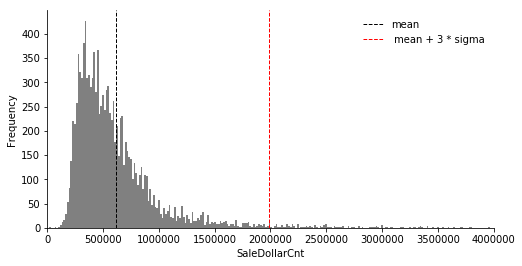

In [20]:
fig, ax = plot_distribution(train_data, 'SaleDollarCnt')

In [23]:
train_data = three_sigma_outlier(train_data, 'SaleDollarCnt')

### Save Cleaned data

In [17]:
train_data.to_csv(train_data_cleaned_path)
test_data.to_csv(test_data_cleaned_path)